# Project: Fertilizer Use and Pricing

This product summarizes fertilizer consumption in the United States by plant nutrient and major fertilizer products—as well as consumption of mixed fertilizers, secondary nutrients, and micronutrients—for 1960 through the latest year for which statistics are available.

Tables in this product provide annual fertilizer use and price data at the national and State levels. The Association of American Plant Food Control Officials, The Fertilizer Institute, and USDA, National Agricultural Statistics Service (NASS) QuickStats are the primary data sources for national statistics.


### Summary ###
The dataset comprises of an excel workbook divided into 7 sheets, representing various types of data. The excel workbook is loaded to an OrderedDict and the following techniques have been applied:
1. Data Exploration
2. Data Wrangling
3. Data Exploration
4. Data Training and Prediction using Linear Regression algorithm

In [3]:
#Importing the modules that will be used in this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing excel dataset with multiple tabs into a single dataframe

In [4]:
fertilizer_use = pd.read_excel("fertilizeruse_Updated.xls", sheet_name= None)
#Using keys function of collections.OrderedDict to fetch all the sheet names
fertilizer_use.keys()

odict_keys(['Table of contents', 'Table1', 'Table2', 'Table3', 'Table4', 'Table5', 'Table6', 'Table7'])

## 1. Data Exploration of all OrderedDictionaries i.e. excel sheets

In [5]:
#Reading the table of contents
fertilizer_use["Table of contents"].head(10)

,The following tables may be found in the tabs in this workbook:
0,Table 1. U.S. consumption of plant nutrients
1,Table 2. Estimated U.S. plant nutrient use by ...
2,"Table 3. U.S. consumption of single, multiple,..."
3,Table 5. U.S. consumption of selected phosphat...
4,Table 5. U.S. consumption of selected secondar...
5,Table 6. Average U.S. farm prices of selected ...
6,Table 7. U.S. consumption of selected phosphat...


In order to improve readability of data in each OrderedDict (i.e. each excel sheet), renaming them appropriately

In [6]:
#Making a copy of the original OrderedDict
temp_dict = fertilizer_use.copy()
#Renaming the OrderedDict Keys
old_new_keys = {'Table1':'Plant_Nutrients_Consumption', 'Table2':'Plant_Nutrients_Use_KiloTons', 
               'Table3':'Consumption_Single_KiloTons', 'Table4':'Consumption_Nitrogen_Tons',
               'Table5':'Consumption_Secondary_Tons','Table6':'Farm_Prices_Fertilizers', 'Table7':'Consumption_Phosphate_Tons'}

for key,value in old_new_keys.items():
    temp_dict[value] = temp_dict[key]
    del temp_dict[key]
    
temp_dict.keys()

odict_keys(['Table of contents', 'Plant_Nutrients_Consumption', 'Plant_Nutrients_Use_KiloTons', 'Consumption_Single_KiloTons', 'Consumption_Nitrogen_Tons', 'Consumption_Secondary_Tons', 'Farm_Prices_Fertilizers', 'Consumption_Phosphate_Tons'])

In [7]:
#Reassigning the temp_dict to the original OrderedDict i.e. fertilizer_use
fertilizer_use = temp_dict
fertilizer_use.keys()

odict_keys(['Table of contents', 'Plant_Nutrients_Consumption', 'Plant_Nutrients_Use_KiloTons', 'Consumption_Single_KiloTons', 'Consumption_Nitrogen_Tons', 'Consumption_Secondary_Tons', 'Farm_Prices_Fertilizers', 'Consumption_Phosphate_Tons'])

### Data Exploration of 'Plant Nutrients Consumption'

In [8]:
fertilizer_use["Plant_Nutrients_Consumption"].head()


,Year ending June 30,Nitrogen (N),Phosphate (P2O5),Potash (K2O),Total,Unnamed: 5,Nitrogen%,Phosphate%,Potash%
0,1960,2738.0,2572.4,2153.3,7463.7,NaN,36.684218,34.465480,28.850302
1,1961,3030.8,2645.1,2168.5,7844.4,NaN,38.636480,33.719596,27.643924
2,1962,3370.0,2807.0,2270.5,8447.5,NaN,39.893460,33.228766,26.877774
3,1963,3929.1,3072.9,2503.4,9505.4,NaN,41.335451,32.327940,26.336609
4,1964,4352.8,3377.8,2729.7,10460.3,NaN,41.612573,32.291617,26.095810


In [9]:
fertilizer_use["Plant_Nutrients_Consumption"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 9 columns):
Year ending June 30    56 non-null int64
  Nitrogen (N)         56 non-null float64
 Phosphate (P2O5)      56 non-null float64
   Potash (K2O)        56 non-null float64
   Total               56 non-null float64
Unnamed: 5             0 non-null float64
Nitrogen%              56 non-null float64
 Phosphate%            56 non-null float64
Potash%                56 non-null float64
dtypes: float64(8), int64(1)
memory usage: 4.1 KB


Few observations here:
1. Few columns like Nitrogen, Potash (K20), Total, Phosphate% have leading whitespaces
2. Column 'Unnamed: 5' has only null values
3. All columns have numeric datatypes

In [10]:
#Resolving Observation 1 - Removing whitespaces from all columns
#Also standardising the column naming to have underscores instead of spaces between words
fertilizer_use["Plant_Nutrients_Consumption"].columns = fertilizer_use["Plant_Nutrients_Consumption"].columns.str.strip().str.replace(' ','_')

In [11]:
fertilizer_use["Plant_Nutrients_Consumption"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 9 columns):
Year_ending_June_30    56 non-null int64
Nitrogen_(N)           56 non-null float64
Phosphate_(P2O5)       56 non-null float64
Potash_(K2O)           56 non-null float64
Total                  56 non-null float64
Unnamed:_5             0 non-null float64
Nitrogen%              56 non-null float64
Phosphate%             56 non-null float64
Potash%                56 non-null float64
dtypes: float64(8), int64(1)
memory usage: 4.1 KB


In [12]:
#Resolving Observation 2 - Dropping column Unnamed:_5
fertilizer_use["Plant_Nutrients_Consumption"].drop(columns = "Unnamed:_5",inplace = True)

In [13]:
fertilizer_use["Plant_Nutrients_Consumption"].isnull().sum()

Year_ending_June_30    0
Nitrogen_(N)           0
Phosphate_(P2O5)       0
Potash_(K2O)           0
Total                  0
Nitrogen%              0
Phosphate%             0
Potash%                0
dtype: int64

In [14]:
#The original dataset had the columns: Nitrogen_(N), Phosphate_(P205) and Potash_(K20) metrics in Kilo Tons
#Renaming these columns appropriately and multiplying the with 1000 to convert from kilo tons to tons.
fertilizer_use["Plant_Nutrients_Consumption"].rename(columns={"Nitrogen_(N)":"Nitrogen_(N)_Ton",
                                                              "Phosphate_(P2O5)":"Phosphate_(P205)_Ton",
                                                              "Potash_(K2O)":"Potash_(K20)_Ton",
                                                             "Total":"Total_Nit_Ph_P"},inplace=True)

In [15]:
fertilizer_use["Plant_Nutrients_Consumption"]["Nitrogen_(N)_Ton"] *= 1000
fertilizer_use["Plant_Nutrients_Consumption"]["Phosphate_(P205)_Ton"] *= 1000
fertilizer_use["Plant_Nutrients_Consumption"]["Potash_(K20)_Ton"] *= 1000
fertilizer_use["Plant_Nutrients_Consumption"]["Total_Nit_Ph_P"] *= 1000

In [16]:
fertilizer_use["Plant_Nutrients_Consumption"].head()

,Year_ending_June_30,Nitrogen_(N)_Ton,Phosphate_(P205)_Ton,Potash_(K20)_Ton,Total_Nit_Ph_P,Nitrogen%,Phosphate%,Potash%
0,1960,2738000.0,2572400.0,2153300.0,7463700.0,36.684218,34.465480,28.850302
1,1961,3030800.0,2645100.0,2168500.0,7844400.0,38.636480,33.719596,27.643924
2,1962,3370000.0,2807000.0,2270500.0,8447500.0,39.893460,33.228766,26.877774
3,1963,3929100.0,3072900.0,2503400.0,9505400.0,41.335451,32.327940,26.336609
4,1964,4352800.0,3377800.0,2729700.0,10460300.0,41.612573,32.291617,26.095810


In [17]:
fertilizer_use["Plant_Nutrients_Consumption"].describe()

,Year_ending_June_30,Nitrogen_(N)_Ton,Phosphate_(P205)_Ton,Potash_(K20)_Ton,Total_Nit_Ph_P,Nitrogen%,Phosphate%,Potash%
count,56.000000,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,56.000000,56.000000,56.000000
mean,1987.500000,1.011147e+07,4.385950e+06,4.664384e+06,1.916181e+07,51.662647,23.783698,24.553646
std,16.309506,2.959027e+06,6.592619e+05,1.010767e+06,4.287949e+06,6.212339,4.603272,2.104005
min,1960.000000,2.738000e+06,2.572400e+06,2.153300e+06,7.463700e+06,36.684218,17.746643,17.424234
25%,1973.750000,8.524375e+06,4.194925e+06,4.421600e+06,1.764975e+07,47.369662,20.467903,23.320157
50%,1987.500000,1.118955e+07,4.444450e+06,4.951950e+06,2.085155e+07,53.588346,21.204754,25.035518
75%,2001.250000,1.230570e+07,4.695450e+06,5.220775e+06,2.203758e+07,55.895217,26.768406,26.070454
max,2015.000000,1.350230e+07,5.629700e+06,6.319500e+06,2.367770e+07,64.829123,34.465480,28.850302


We have here data from 1960 to 2015. Nitrogen is the maximum component of plants consumption at 65%, followed by Phosphate at 34%. 

### Data Exploration of 'Plant Nutrients Use_KiloTons'

In [18]:
fertilizer_use["Plant_Nutrients_Use_KiloTons"].info()
fertilizer_use["Plant_Nutrients_Use_KiloTons"].isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 16 columns):
Year ending June 30    55 non-null int64
   Corn_Nitrogen       50 non-null float64
Cotton_Nitrogen        49 non-null float64
Soybeans_Nitrogen      51 non-null float64
  Wheat_Nitrogen       51 non-null float64
  Other _Nitrogen      47 non-null float64
  Corn_Phosphate       53 non-null object
Cotton_Phosphate       53 non-null object
Soybeans_Phosphate     51 non-null float64
  Wheat_Phosphate      51 non-null float64
  Other _Phosphate     47 non-null float64
  Corn_Potash          50 non-null float64
Cotton_Potash          49 non-null float64
Soybeans_Potash        51 non-null float64
  Wheat_Potash         51 non-null float64
  Other _Potash        47 non-null float64
dtypes: float64(13), int64(1), object(2)
memory usage: 7.0+ KB


Year ending June 30    0
   Corn_Nitrogen       5
Cotton_Nitrogen        6
Soybeans_Nitrogen      4
  Wheat_Nitrogen       4
  Other _Nitrogen      8
  Corn_Phosphate       2
Cotton_Phosphate       2
Soybeans_Phosphate     4
  Wheat_Phosphate      4
  Other _Phosphate     8
  Corn_Potash          5
Cotton_Potash          6
Soybeans_Potash        4
  Wheat_Potash         4
  Other _Potash        8
dtype: int64

In [19]:
#Stripping whitespaces and Standardising the columns names
fertilizer_use["Plant_Nutrients_Use_KiloTons"].columns = fertilizer_use["Plant_Nutrients_Use_KiloTons"].columns.str.strip().str.replace(" ", "")

In [20]:
fertilizer_use["Plant_Nutrients_Use_KiloTons"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 16 columns):
YearendingJune30      55 non-null int64
Corn_Nitrogen         50 non-null float64
Cotton_Nitrogen       49 non-null float64
Soybeans_Nitrogen     51 non-null float64
Wheat_Nitrogen        51 non-null float64
Other_Nitrogen        47 non-null float64
Corn_Phosphate        53 non-null object
Cotton_Phosphate      53 non-null object
Soybeans_Phosphate    51 non-null float64
Wheat_Phosphate       51 non-null float64
Other_Phosphate       47 non-null float64
Corn_Potash           50 non-null float64
Cotton_Potash         49 non-null float64
Soybeans_Potash       51 non-null float64
Wheat_Potash          51 non-null float64
Other_Potash          47 non-null float64
dtypes: float64(13), int64(1), object(2)
memory usage: 7.0+ KB


In [21]:
fertilizer_use["Plant_Nutrients_Use_KiloTons"].rename(columns = {"YearendingJune30":"Year_Ending_June30"},inplace = True)

In [22]:
fertilizer_use["Plant_Nutrients_Use_KiloTons"].head(10)

,Year_Ending_June30,Corn_Nitrogen,Cotton_Nitrogen,Soybeans_Nitrogen,Wheat_Nitrogen,Other_Nitrogen,Corn_Phosphate,Cotton_Phosphate,Soybeans_Phosphate,Wheat_Phosphate,Other_Phosphate,Corn_Potash,Cotton_Potash,Soybeans_Potash,Wheat_Potash,Other_Potash
0,1964,1622.53695,394.107714,15.543290,353.238840,1967.373206,1052.51,210.814,57.097800,270.56592,1787.0,829.36980,175.000000,70.420620,151.427840,1503.000000
1,1965,2150.64300,452.802838,19.374850,426.765840,1588.913472,1336.01,229.621,90.181120,326.95770,1529.0,1204.36008,177.469842,116.777505,150.572625,1185.319948
2,1966,2596.15811,330.352848,40.277520,424.183200,1935.328322,1626.16,167.919,164.839480,328.95840,1609.0,1512.71160,135.059670,183.486480,150.141375,1239.800875
3,1967,3044.05368,268.746624,55.717935,623.873600,2034.708161,1857.17,145.524,203.890905,462.77632,1635.0,1750.43760,103.945600,231.443730,222.980160,1332.992910
4,1968,3115.62784,318.656680,66.567375,623.548800,2663.199305,1854.79,174.17,211.113675,425.59680,1788.0,1777.93980,136.083863,256.759875,189.291600,1432.524862
5,1969,3287.10360,405.490313,48.488760,568.708000,2647.809328,1789.11,192.496,226.706220,399.80600,2057.0,1765.33208,132.073987,275.620320,177.186750,1541.386862
6,1970,3519.66832,322.520400,63.330540,579.750405,2973.730335,2136.27,157.677,215.194590,321.67740,1743.0,2046.00780,122.557752,307.605480,175.460400,1383.868568
7,1971,3730.46191,342.848475,61.953300,613.570800,3384.765515,2023.6,163.702,228.901140,375.13934,2012.0,1946.45696,139.733919,281.724480,135.631440,1727.853201
8,1972,3705.35520,404.287537,72.173640,783.059380,3057.424243,1993.64,211.77,285.413940,446.99182,1926.0,1991.62842,175.086256,370.475730,156.502050,1633.107544
9,1973,3830.13153,337.076697,95.002320,895.920480,3136.968973,1988.4,181.892,380.009280,506.62170,2028.0,2051.98520,150.879573,497.631200,181.317240,1766.886787


Corn_Phosphate and Cotton_Phosphate columns are recognised as string type but looking at the data, it should be floating

There are NA values in the columns, which will not allow the datatype conversion. Hence, tackling the null values first

In [23]:
fertilizer_use["Plant_Nutrients_Use_KiloTons"].dropna(inplace=True)

In [24]:
fertilizer_use["Plant_Nutrients_Use_KiloTons"].isnull().sum()

Year_Ending_June30    0
Corn_Nitrogen         0
Cotton_Nitrogen       0
Soybeans_Nitrogen     0
Wheat_Nitrogen        0
Other_Nitrogen        0
Corn_Phosphate        0
Cotton_Phosphate      0
Soybeans_Phosphate    0
Wheat_Phosphate       0
Other_Phosphate       0
Corn_Potash           0
Cotton_Potash         0
Soybeans_Potash       0
Wheat_Potash          0
Other_Potash          0
dtype: int64

In [25]:
fertilizer_use["Plant_Nutrients_Use_KiloTons"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 46
Data columns (total 16 columns):
Year_Ending_June30    47 non-null int64
Corn_Nitrogen         47 non-null float64
Cotton_Nitrogen       47 non-null float64
Soybeans_Nitrogen     47 non-null float64
Wheat_Nitrogen        47 non-null float64
Other_Nitrogen        47 non-null float64
Corn_Phosphate        47 non-null object
Cotton_Phosphate      47 non-null object
Soybeans_Phosphate    47 non-null float64
Wheat_Phosphate       47 non-null float64
Other_Phosphate       47 non-null float64
Corn_Potash           47 non-null float64
Cotton_Potash         47 non-null float64
Soybeans_Potash       47 non-null float64
Wheat_Potash          47 non-null float64
Other_Potash          47 non-null float64
dtypes: float64(13), int64(1), object(2)
memory usage: 6.2+ KB


In [26]:
#Converting the datatype for the columns: Corn-Phosphate and Cotton_Phosphate
fertilizer_use["Plant_Nutrients_Use_KiloTons"] = fertilizer_use["Plant_Nutrients_Use_KiloTons"].astype({"Corn_Phosphate":"float",
                                                                                      "Cotton_Phosphate":"float"})

In [27]:
fertilizer_use["Plant_Nutrients_Use_KiloTons"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 46
Data columns (total 16 columns):
Year_Ending_June30    47 non-null int64
Corn_Nitrogen         47 non-null float64
Cotton_Nitrogen       47 non-null float64
Soybeans_Nitrogen     47 non-null float64
Wheat_Nitrogen        47 non-null float64
Other_Nitrogen        47 non-null float64
Corn_Phosphate        47 non-null float64
Cotton_Phosphate      47 non-null float64
Soybeans_Phosphate    47 non-null float64
Wheat_Phosphate       47 non-null float64
Other_Phosphate       47 non-null float64
Corn_Potash           47 non-null float64
Cotton_Potash         47 non-null float64
Soybeans_Potash       47 non-null float64
Wheat_Potash          47 non-null float64
Other_Potash          47 non-null float64
dtypes: float64(15), int64(1)
memory usage: 6.2 KB


In [28]:
fertilizer_use["Plant_Nutrients_Use_KiloTons"].head()

,Year_Ending_June30,Corn_Nitrogen,Cotton_Nitrogen,Soybeans_Nitrogen,Wheat_Nitrogen,Other_Nitrogen,Corn_Phosphate,Cotton_Phosphate,Soybeans_Phosphate,Wheat_Phosphate,Other_Phosphate,Corn_Potash,Cotton_Potash,Soybeans_Potash,Wheat_Potash,Other_Potash
0,1964,1622.53695,394.107714,15.543290,353.23884,1967.373206,1052.50977,210.813876,57.097800,270.56592,1787.0,829.36980,175.000000,70.420620,151.427840,1503.000000
1,1965,2150.64300,452.802838,19.374850,426.76584,1588.913472,1336.00550,229.621068,90.181120,326.95770,1529.0,1204.36008,177.469842,116.777505,150.572625,1185.319948
2,1966,2596.15811,330.352848,40.277520,424.18320,1935.328322,1626.16497,167.919015,164.839480,328.95840,1609.0,1512.71160,135.059670,183.486480,150.141375,1239.800875
3,1967,3044.05368,268.746624,55.717935,623.87360,2034.708161,1857.17160,145.523840,203.890905,462.77632,1635.0,1750.43760,103.945600,231.443730,222.980160,1332.992910
4,1968,3115.62784,318.656680,66.567375,623.54880,2663.199305,1854.78848,174.169884,211.113675,425.59680,1788.0,1777.93980,136.083863,256.759875,189.291600,1432.524862


In [29]:
#Converting all column values to tons from kilo tons except for Year
colnames = fertilizer_use["Plant_Nutrients_Use_KiloTons"].drop(columns = "Year_Ending_June30").columns
for val in colnames:
    fertilizer_use["Plant_Nutrients_Use_KiloTons"][val] *= 1000
fertilizer_use["Plant_Nutrients_Use_KiloTons"].head()

,Year_Ending_June30,Corn_Nitrogen,Cotton_Nitrogen,Soybeans_Nitrogen,Wheat_Nitrogen,Other_Nitrogen,Corn_Phosphate,Cotton_Phosphate,Soybeans_Phosphate,Wheat_Phosphate,Other_Phosphate,Corn_Potash,Cotton_Potash,Soybeans_Potash,Wheat_Potash,Other_Potash
0,1964,1622536.95,394107.7140,15543.290,353238.84,1.967373e+06,1052509.77,210813.8760,57097.800,270565.92,1787000.0,829369.80,175000.000,70420.620,151427.840,1503000.000
1,1965,2150643.00,452802.8385,19374.850,426765.84,1.588913e+06,1336005.50,229621.0675,90181.120,326957.70,1529000.0,1204360.08,177469.842,116777.505,150572.625,1185319.948
2,1966,2596158.11,330352.8480,40277.520,424183.20,1.935328e+06,1626164.97,167919.0150,164839.480,328958.40,1609000.0,1512711.60,135059.670,183486.480,150141.375,1239800.875
3,1967,3044053.68,268746.6240,55717.935,623873.60,2.034708e+06,1857171.60,145523.8400,203890.905,462776.32,1635000.0,1750437.60,103945.600,231443.730,222980.160,1332992.910
4,1968,3115627.84,318656.6800,66567.375,623548.80,2.663199e+06,1854788.48,174169.8840,211113.675,425596.80,1788000.0,1777939.80,136083.863,256759.875,189291.600,1432524.862


In [30]:
fertilizer_use["Plant_Nutrients_Use_KiloTons"].describe()

,Year_Ending_June30,Corn_Nitrogen,Cotton_Nitrogen,Soybeans_Nitrogen,Wheat_Nitrogen,Other_Nitrogen,Corn_Phosphate,Cotton_Phosphate,Soybeans_Phosphate,Wheat_Phosphate,Other_Phosphate,Corn_Potash,Cotton_Potash,Soybeans_Potash,Wheat_Potash,Other_Potash
count,47.000000,4.700000e+01,47.000000,47.000000,4.700000e+01,4.700000e+01,4.700000e+01,47.000000,47.000000,47.000000,4.700000e+01,4.700000e+01,47.000000,4.700000e+01,47.000000,4.700000e+01
mean,1987.000000,4.451845e+06,419110.926212,105135.972987,1.454714e+06,3.932406e+06,1.893458e+06,169208.407314,365473.281543,598122.454556,1.488870e+06,2.132726e+06,161685.630989,6.195859e+05,233001.900230,1.705710e+06
std,13.711309,9.092140e+05,104522.431940,37907.790390,5.268506e+05,9.956390e+05,3.250129e+05,40369.638932,118631.801844,138635.667873,2.848689e+05,4.536874e+05,77201.502577,2.348661e+05,69599.273602,2.687094e+05
min,1964.000000,1.622537e+06,218290.302000,15543.290000,3.532388e+05,1.588913e+06,1.052510e+06,78470.370000,57097.800000,270565.920000,8.272876e+05,8.293698e+05,61825.140000,7.042062e+04,89999.910000,9.079333e+05
25%,1975.500000,3.922326e+06,342951.943500,81005.250000,1.081874e+06,3.349503e+06,1.695855e+06,143720.836000,298405.590000,492926.590000,1.285386e+06,1.910619e+06,98445.543750,4.750261e+05,180403.660000,1.553348e+06
50%,1987.000000,4.715038e+06,404287.537500,109000.000000,1.650650e+06,3.971262e+06,1.854788e+06,167730.000000,380009.280000,634830.000000,1.529000e+06,2.076247e+06,139602.017500,6.818040e+05,227227.270000,1.712484e+06
75%,1998.500000,4.965751e+06,505000.000000,137108.825000,1.835226e+06,4.806192e+06,2.044802e+06,208000.000000,444452.700000,717973.622500,1.635000e+06,2.304945e+06,197000.000000,7.772888e+05,284714.190000,1.868093e+06
max,2010.000000,5.714000e+06,699690.105000,175012.500000,2.207623e+06,5.620748e+06,2.550328e+06,236000.000000,624132.140000,808820.415000,2.057000e+06,3.037584e+06,314000.000000,1.016473e+06,414779.700000,2.253974e+06


Data from 1964 to 2010 is represented.

### Data Exploration of 'Consumption_Single_KiloTons'

In [31]:
fertilizer_use["Consumption_Single_KiloTons"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 9 columns):
Year ending June 30                                    56 non-null int64
  Multiple-nutrient material-1000 material ton         56 non-null int64
Single-nutrient material-1000 material ton             56 non-null int64
    Secondary and micro-nutrients-1000 material ton    56 non-null int64
Total                                                  56 non-null int64
Unnamed: 5                                             0 non-null float64
  Multiple-nutrient material%                          56 non-null float64
 Single nutrient materials%                            56 non-null float64
Secondary and mico-nutrients%                          56 non-null float64
dtypes: float64(4), int64(5)
memory usage: 4.1 KB


In [32]:
#Standardising Column names
fertilizer_use["Consumption_Single_KiloTons"].columns = fertilizer_use["Consumption_Single_KiloTons"].columns.str.strip().str.replace(" ","_").str.replace("-","_")

In [33]:
fertilizer_use["Consumption_Single_KiloTons"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 9 columns):
Year_ending_June_30                                56 non-null int64
Multiple_nutrient_material_1000_material_ton       56 non-null int64
Single_nutrient_material_1000_material_ton         56 non-null int64
Secondary_and_micro_nutrients_1000_material_ton    56 non-null int64
Total                                              56 non-null int64
Unnamed:_5                                         0 non-null float64
Multiple_nutrient_material%                        56 non-null float64
Single_nutrient_materials%                         56 non-null float64
Secondary_and_mico_nutrients%                      56 non-null float64
dtypes: float64(4), int64(5)
memory usage: 4.1 KB


In [34]:
#Shortening column names where required
fertilizer_use["Consumption_Single_KiloTons"].rename(columns = {"Year_ending_June_30":"Year_Ending_June30",
                                                                "Multiple_nutrient_material_1000_material_ton":"Multiple_nutrients",
                                                               "Single_nutrient_material_1000_material_ton":"Single_nutrient",
                                                               "Secondary_and_micro_nutrients_1000_material_ton":"Secondary_nutrients",
                                                                "Total":"Total_Mul_Sin_Sec"
                                                               },
                                                    inplace = True)


In [35]:
fertilizer_use["Consumption_Single_KiloTons"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 9 columns):
Year_Ending_June30               56 non-null int64
Multiple_nutrients               56 non-null int64
Single_nutrient                  56 non-null int64
Secondary_nutrients              56 non-null int64
Total_Mul_Sin_Sec                56 non-null int64
Unnamed:_5                       0 non-null float64
Multiple_nutrient_material%      56 non-null float64
Single_nutrient_materials%       56 non-null float64
Secondary_and_mico_nutrients%    56 non-null float64
dtypes: float64(4), int64(5)
memory usage: 4.1 KB


In [36]:
#Deleting Unnamed:_5 column that has no values
fertilizer_use["Consumption_Single_KiloTons"].drop(columns = "Unnamed:_5",inplace = True)

In [37]:
fertilizer_use["Consumption_Single_KiloTons"].isnull().sum()

Year_Ending_June30               0
Multiple_nutrients               0
Single_nutrient                  0
Secondary_nutrients              0
Total_Mul_Sin_Sec                0
Multiple_nutrient_material%      0
Single_nutrient_materials%       0
Secondary_and_mico_nutrients%    0
dtype: int64

In [38]:
#Converting all column values to tons from kilo tons except for Year and % columns
colnames = fertilizer_use["Consumption_Single_KiloTons"].drop(columns = ["Year_Ending_June30","Multiple_nutrient_material%","Single_nutrient_materials%","Secondary_and_mico_nutrients%"]).columns
for val in colnames:
    fertilizer_use["Consumption_Single_KiloTons"][val] *= 1000
fertilizer_use["Consumption_Single_KiloTons"].head()

,Year_Ending_June30,Multiple_nutrients,Single_nutrient,Secondary_nutrients,Total_Mul_Sin_Sec,Multiple_nutrient_material%,Single_nutrient_materials%,Secondary_and_mico_nutrients%
0,1960,15650000,7850000,1378000,24878000,62.906986,31.553983,5.539030
1,1961,15735000,8639000,1194000,25568000,61.541771,33.788329,4.669900
2,1962,16205000,9100000,1310000,26615000,60.886718,34.191246,4.922036
3,1963,17157000,10299000,1459000,28915000,59.335985,35.618191,5.045824
4,1964,18093000,11113000,1475000,30681000,58.971350,36.221114,4.807536


In [39]:
fertilizer_use["Consumption_Single_KiloTons"].describe()

,Year_Ending_June30,Multiple_nutrients,Single_nutrient,Secondary_nutrients,Total_Mul_Sin_Sec,Multiple_nutrient_material%,Single_nutrient_materials%,Secondary_and_mico_nutrients%
count,56.000000,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,56.000000,56.000000,56.000000
mean,1987.500000,1.939912e+07,2.537711e+07,2.752911e+06,4.752914e+07,42.534004,51.935380,5.530616
std,16.309506,2.258451e+06,8.109962e+06,1.516610e+06,9.486717e+06,9.898269,8.632782,2.038589
min,1960.000000,1.417500e+07,7.850000e+06,1.194000e+06,2.487800e+07,28.036672,31.553983,2.957342
25%,1973.750000,1.779450e+07,1.978800e+07,1.615250e+06,4.231625e+07,35.090859,44.696202,4.142281
50%,1987.500000,1.920500e+07,2.693550e+07,2.284000e+06,4.919350e+07,39.685681,56.219990,4.906634
75%,2001.250000,2.100375e+07,3.141075e+07,3.404500e+06,5.367000e+07,51.349638,58.748562,6.143049
max,2015.000000,2.409900e+07,3.787000e+07,7.021000e+06,6.406000e+07,62.906986,61.865322,11.372435


The data represented is from year 1960 to 2015

### Data Exploration of Consumption_Nitrogen_Tons

In [40]:
fertilizer_use["Consumption_Nitrogen_Tons"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 10 columns):
Year ending June 30                  57 non-null object
Ammonia (Anhydrous)_material tons    56 non-null float64
Ammonia (Aqua)_material tons         56 non-null float64
Unnamed: 3                           0 non-null float64
Ammonium (Nitrate)_material tons     56 non-null float64
Ammonium (Sulfate)_material tons     56 non-null float64
 Nitrogen solutions_material tons    56 non-null float64
  Sodium nitrate_material tons       56 non-null float64
      Urea_material tons             56 non-null float64
   Other_material tons               56 non-null float64
dtypes: float64(9), object(1)
memory usage: 4.6+ KB


In [41]:
#Standardising column_names
fertilizer_use["Consumption_Nitrogen_Tons"].columns = fertilizer_use["Consumption_Nitrogen_Tons"].columns.str.strip().str.replace(" ","_").str.replace("_material_tons","")
fertilizer_use["Consumption_Nitrogen_Tons"].rename(columns={"Year_ending_June_30":"Year_Ending_June30"},inplace = True)

In [42]:
#Deleting Unnamed:_3 column
fertilizer_use["Consumption_Nitrogen_Tons"].drop(columns = "Unnamed:_3", inplace = True)

In [43]:
fertilizer_use["Consumption_Nitrogen_Tons"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 9 columns):
Year_Ending_June30     57 non-null object
Ammonia_(Anhydrous)    56 non-null float64
Ammonia_(Aqua)         56 non-null float64
Ammonium_(Nitrate)     56 non-null float64
Ammonium_(Sulfate)     56 non-null float64
Nitrogen_solutions     56 non-null float64
Sodium_nitrate         56 non-null float64
Urea                   56 non-null float64
Other                  56 non-null float64
dtypes: float64(8), object(1)
memory usage: 4.1+ KB


In [44]:
fertilizer_use["Consumption_Nitrogen_Tons"]

,Year_Ending_June30,Ammonia_(Anhydrous),Ammonia_(Aqua),Ammonium_(Nitrate),Ammonium_(Sulfate),Nitrogen_solutions,Sodium_nitrate,Urea,Other
0,1960,708798.0,427062.0,1231294.0,534795.0,650259.0,454341.0,142198.0,394163.0
1,1961,811490.0,432494.0,1324569.0,552264.0,948785.0,407766.0,203934.0,358760.0
2,1962,934743.0,496303.0,1387769.0,557701.0,1190979.0,407792.0,292622.0,330451.0
3,1963,1226266.0,579165.0,1480186.0,703963.0,1493507.0,381343.0,364439.0,307885.0
4,1964,1398379.0,776219.0,1643504.0,712327.0,1680367.0,337866.0,406360.0,295307.0
5,1965,1563376.0,819665.0,1634294.0,774503.0,1922126.0,301111.0,427555.0,252410.0
6,1966,1959601.0,972291.0,1823004.0,792347.0,2305118.0,243576.0,467359.0,215909.0
7,1967,2406824.0,862931.0,2141514.0,839941.0,2562625.0,199118.0,505769.0,202007.0
8,1968,3072190.0,813543.0,2376459.0,843286.0,2645424.0,153385.0,550250.0,193767.0
9,1969,3138333.0,701050.0,2574077.0,762955.0,2791582.0,104470.0,581879.0,223899.0


In [45]:
#Deleting the last line with null values
fertilizer_use["Consumption_Nitrogen_Tons"].dropna(axis = 0,inplace = True)

In [46]:
fertilizer_use["Consumption_Nitrogen_Tons"] = fertilizer_use["Consumption_Nitrogen_Tons"].astype({"Year_Ending_June30":"int64"})
fertilizer_use["Consumption_Nitrogen_Tons"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 55
Data columns (total 9 columns):
Year_Ending_June30     56 non-null int64
Ammonia_(Anhydrous)    56 non-null float64
Ammonia_(Aqua)         56 non-null float64
Ammonium_(Nitrate)     56 non-null float64
Ammonium_(Sulfate)     56 non-null float64
Nitrogen_solutions     56 non-null float64
Sodium_nitrate         56 non-null float64
Urea                   56 non-null float64
Other                  56 non-null float64
dtypes: float64(8), int64(1)
memory usage: 4.4 KB


In [47]:
fertilizer_use["Consumption_Nitrogen_Tons"].describe()

,Year_Ending_June30,Ammonia_(Anhydrous),Ammonia_(Aqua),Ammonium_(Nitrate),Ammonium_(Sulfate),Nitrogen_solutions,Sodium_nitrate,Urea,Other
count,56.000000,5.600000e+01,56.000000,5.600000e+01,5.600000e+01,5.600000e+01,56.000000,5.600000e+01,5.600000e+01
mean,1987.500000,3.944824e+06,501226.589286,1.874782e+06,9.844612e+05,7.175318e+06,89778.410714,3.127005e+06,1.328424e+06
std,16.309506,1.217645e+06,194616.833250,7.013755e+05,2.961275e+05,3.490911e+06,111888.525544,2.078193e+06,1.244979e+06
min,1960.000000,7.087980e+05,158211.000000,6.082680e+05,5.347950e+05,6.502590e+05,12978.000000,1.421980e+05,1.638890e+05
25%,1973.750000,3.785460e+06,348686.750000,1.465303e+06,7.809855e+05,3.986306e+06,26532.750000,1.011440e+06,3.582922e+05
50%,1987.500000,4.214236e+06,458599.500000,1.864282e+06,9.014380e+05,7.488751e+06,49982.500000,3.356552e+06,6.351200e+05
75%,2001.250000,4.675984e+06,667336.750000,2.404273e+06,1.132528e+06,1.023476e+07,84175.000000,5.078768e+06,2.250578e+06
max,2015.000000,5.684606e+06,972291.000000,3.280623e+06,1.935361e+06,1.247448e+07,454341.000000,7.038055e+06,6.230048e+06


Data Representation from 1960 to 2015

### Data Exploration of Consumption_Secondary_Tons

In [48]:
fertilizer_use["Consumption_Secondary_Tons"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
Year                                     30 non-null int64
Gypsum_material tons                     30 non-null int64
Sulfur_material tons                     30 non-null int64
Sulfuric Acid_material tons              30 non-null int64
Zinc compound_material tons              30 non-null int64
Unnamed: 5                               1 non-null float64
Compost_material tons                    30 non-null int64
Dried manure_material tons               30 non-null int64
Sewage sludge_material tons              30 non-null int64
Other organic materials_material tons    30 non-null int64
dtypes: float64(1), int64(9)
memory usage: 2.5 KB


In [49]:
#Standardising column names
fertilizer_use["Consumption_Secondary_Tons"].columns = fertilizer_use["Consumption_Secondary_Tons"].columns.str.replace(" ","_").str.replace("_material_tons","")

In [50]:
#Fetching the row/s where unnamed:_5 is not null
fertilizer_use["Consumption_Secondary_Tons"].loc[fertilizer_use["Consumption_Secondary_Tons"]["Unnamed:_5"].isnull() == "False"]

C:\Users\Abc\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Year,Gypsum,Sulfur,Sulfuric_Acid,Zinc_compound,Unnamed:_5,Compost,Dried_manure,Sewage_sludge,Other_organic_materials


In [51]:
#Deleting the unnamed* column
fertilizer_use["Consumption_Secondary_Tons"].drop(columns = "Unnamed:_5",inplace=True)

In [52]:
fertilizer_use["Consumption_Secondary_Tons"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
Year                       30 non-null int64
Gypsum                     30 non-null int64
Sulfur                     30 non-null int64
Sulfuric_Acid              30 non-null int64
Zinc_compound              30 non-null int64
Compost                    30 non-null int64
Dried_manure               30 non-null int64
Sewage_sludge              30 non-null int64
Other_organic_materials    30 non-null int64
dtypes: int64(9)
memory usage: 2.2 KB


In [53]:
fertilizer_use["Consumption_Secondary_Tons"].describe()

,Year,Gypsum,Sulfur,Sulfuric_Acid,Zinc_compound,Compost,Dried_manure,Sewage_sludge,Other_organic_materials
count,30.000000,3.000000e+01,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2000.500000,1.590092e+06,208079.833333,111574.400000,44183.566667,71016.900000,145624.500000,104852.033333,200905.166667
std,8.803408,4.508200e+05,127351.755126,170479.549501,10133.482441,43150.948995,28356.339203,55809.554606,85519.083180
min,1986.000000,9.951620e+05,41385.000000,15393.000000,27016.000000,8968.000000,88976.000000,39802.000000,18432.000000
25%,1993.250000,1.354703e+06,136375.250000,44198.750000,38368.000000,33866.500000,125520.750000,62275.500000,189937.750000
50%,2000.500000,1.484872e+06,171181.000000,68961.500000,42362.500000,74866.500000,146235.000000,92227.500000,215450.500000
75%,2007.750000,1.639902e+06,241927.500000,107334.250000,48282.500000,92650.250000,159980.250000,112297.250000,247634.500000
max,2015.000000,2.843187e+06,613711.000000,933589.000000,66872.000000,171785.000000,204104.000000,232965.000000,376451.000000


Data Representation from 1986 to 2015

In [54]:
fertilizer_use["Consumption_Secondary_Tons"]["Year"].unique()

array([1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015], dtype=int64)

### Data Exploration of Farm_Prices_Fertilizers

In [55]:
fertilizer_use["Farm_Prices_Fertilizers"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 11 columns):
 Year                               108 non-null int64
Month                               108 non-null object
Anhydrous ammonia                   108 non-null float64
Nitrogen solutions (30%)            95 non-null float64
Urea 44-46% nitrogen                108 non-null float64
Ammonium nitrate                    108 non-null float64
Sulfate of ammonium                 108 non-null float64
Super-phosphate 20% phosphate       52 non-null float64
Super-phosphate 44-46% phosphate    108 non-null float64
Diammonium phosphate (18-46-0)      95 non-null float64
Potassium chloride 60% potassium    108 non-null float64
dtypes: float64(9), int64(1), object(1)
memory usage: 9.4+ KB


In [56]:
#Standardising Column names
fertilizer_use["Farm_Prices_Fertilizers"].columns = fertilizer_use["Farm_Prices_Fertilizers"].columns.str.strip().str.replace(" ","_")
fertilizer_use["Farm_Prices_Fertilizers"].rename(columns={"Diammonium_phosphate_(18-46-0)":"Diammonium_phosphate"}, inplace=True)

In [57]:
#Adding a suffix to indicate price columns (will be later used for merging with other OrderedDict)
fertilizer_use["Farm_Prices_Fertilizers"] = fertilizer_use["Farm_Prices_Fertilizers"].add_suffix("_Price")
fertilizer_use["Farm_Prices_Fertilizers"].rename(columns = {"Year_Price":"Year","Month_Price":"Month",
                                                           "Super-phosphate_20%_phosphate_Price":"Super-phosphate_20%_Price",
                                                           "Super-phosphate_44-46%_phosphate_Price":"Super-phosphate_44-46%_Price",
                                                           "Potassium_chloride_60%_potassium_Price":"Potassium_chloride_60%_Price"}, inplace=True)

In [58]:
fertilizer_use["Farm_Prices_Fertilizers"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 11 columns):
Year                              108 non-null int64
Month                             108 non-null object
Anhydrous_ammonia_Price           108 non-null float64
Nitrogen_solutions_(30%)_Price    95 non-null float64
Urea_44-46%_nitrogen_Price        108 non-null float64
Ammonium_nitrate_Price            108 non-null float64
Sulfate_of_ammonium_Price         108 non-null float64
Super-phosphate_20%_Price         52 non-null float64
Super-phosphate_44-46%_Price      108 non-null float64
Diammonium_phosphate_Price        95 non-null float64
Potassium_chloride_60%_Price      108 non-null float64
dtypes: float64(9), int64(1), object(1)
memory usage: 9.4+ KB


Observed null values in columns: Nitrogen_solutions_(30%), Super-phosphate_20%\_phosphate, Diammonium_phosphate

In [59]:
fertilizer_use["Farm_Prices_Fertilizers"]["Year"].value_counts()

1985    4
1984    4
1983    4
1982    4
1981    4
1980    4
1979    4
1978    4
1977    4
1973    2
1976    2
1975    2
1974    2
1987    2
1986    2
1971    2
1970    2
1969    2
1968    2
1967    2
1966    2
1965    2
1964    2
1963    2
1962    2
1961    2
1972    2
1960    2
1989    2
1990    2
1991    2
1992    2
1993    2
1994    2
1988    2
2013    1
2008    1
2006    1
2007    1
2012    1
2009    1
2010    1
2011    1
2004    1
2005    1
2000    1
2003    1
2002    1
2001    1
1999    1
1998    1
1997    1
1996    1
1995    1
2014    1
Name: Year, dtype: int64

In [60]:
#Analysing a subset of data where Year = 1985
fertilizer_use["Farm_Prices_Fertilizers"].loc[fertilizer_use["Farm_Prices_Fertilizers"]["Year"]==1985]

,Year,Month,Anhydrous_ammonia_Price,Nitrogen_solutions_(30%)_Price,Urea_44-46%_nitrogen_Price,Ammonium_nitrate_Price,Sulfate_of_ammonium_Price,Super-phosphate_20%_Price,Super-phosphate_44-46%_Price,Diammonium_phosphate_Price,Potassium_chloride_60%_Price
66,1985,Mar.,255.0,143.0,221.0,192.0,156.0,NaN,206.0,244.0,128.0
67,1985,May,252.0,141.0,217.0,189.0,152.0,NaN,203.0,240.0,128.0
68,1985,Oct.,237.0,140.0,204.0,184.0,154.0,NaN,195.0,229.0,113.0
69,1985,Dec.,233.0,136.0,195.0,183.0,151.0,NaN,192.0,224.0,109.0


This dataset comprises of Monthly reporting (where available). Dropping the rows with null values will delete the data related to quite a few Months and/or Years for the entire dataset. This will risk skewing the data. Hence substituting the null values in a columns with the mean for the same column.

In [61]:
#Replacing null values in Nitrogen_solutions_(30%) with the mean value
nit_mean = fertilizer_use["Farm_Prices_Fertilizers"]["Nitrogen_solutions_(30%)_Price"].mean()
fertilizer_use["Farm_Prices_Fertilizers"]["Nitrogen_solutions_(30%)_Price"].fillna(value = nit_mean,inplace=True)

In [62]:
#Replacing null values in Super-phosphate_20%_phosphate with the mean value
sp_phos_mean = fertilizer_use["Farm_Prices_Fertilizers"]["Super-phosphate_20%_Price"].mean()
fertilizer_use["Farm_Prices_Fertilizers"]["Super-phosphate_20%_Price"].fillna(value = sp_phos_mean,inplace=True)

In [63]:
#Replacing null values in Super-phosphate_20%_phosphate with the mean value
di_phos_mean = fertilizer_use["Farm_Prices_Fertilizers"]["Diammonium_phosphate_Price"].mean()
fertilizer_use["Farm_Prices_Fertilizers"]["Diammonium_phosphate_Price"].fillna(value = di_phos_mean,inplace=True)

In [64]:
fertilizer_use["Farm_Prices_Fertilizers"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 11 columns):
Year                              108 non-null int64
Month                             108 non-null object
Anhydrous_ammonia_Price           108 non-null float64
Nitrogen_solutions_(30%)_Price    108 non-null float64
Urea_44-46%_nitrogen_Price        108 non-null float64
Ammonium_nitrate_Price            108 non-null float64
Sulfate_of_ammonium_Price         108 non-null float64
Super-phosphate_20%_Price         108 non-null float64
Super-phosphate_44-46%_Price      108 non-null float64
Diammonium_phosphate_Price        108 non-null float64
Potassium_chloride_60%_Price      108 non-null float64
dtypes: float64(9), int64(1), object(1)
memory usage: 9.4+ KB


In [65]:
#Replacing dot in Month column
fertilizer_use["Farm_Prices_Fertilizers"]["Month"] = fertilizer_use["Farm_Prices_Fertilizers"]["Month"].str.replace(".","")

In [66]:
fertilizer_use["Farm_Prices_Fertilizers"]["Month"].unique()

array(['  Apr', '  Sept', '  Mar', '  May', '  Oct', '  Dec'],
      dtype=object)

In [67]:
fertilizer_use["Farm_Prices_Fertilizers"].describe(include='all')

,Year,Month,Anhydrous_ammonia_Price,Nitrogen_solutions_(30%)_Price,Urea_44-46%_nitrogen_Price,Ammonium_nitrate_Price,Sulfate_of_ammonium_Price,Super-phosphate_20%_Price,Super-phosphate_44-46%_Price,Diammonium_phosphate_Price,Potassium_chloride_60%_Price
count,108.000000,108,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
unique,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Apr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1982.759259,NaN,236.960185,143.052632,205.186111,176.846296,145.152778,75.278846,207.217593,249.771579,148.612037
std,13.587976,NaN,158.737143,68.993379,111.709656,106.222347,94.957187,25.130148,139.780366,126.589346,137.596772
min,1960.000000,NaN,72.800000,52.400000,80.300000,60.000000,51.200000,37.500000,73.400000,92.000000,45.200000
25%,1973.000000,NaN,141.750000,117.750000,117.000000,82.500000,59.250000,55.425000,92.450000,197.250000,63.075000
50%,1981.500000,NaN,208.000000,137.000000,196.500000,170.500000,145.500000,75.278846,203.500000,245.000000,129.500000
75%,1991.000000,NaN,250.500000,143.052632,227.250000,192.250000,160.000000,75.278846,229.250000,262.250000,153.500000


Data Represented from 1960 to 2014

### Data Exploration of Consumption_Phosphate_Tons

In [68]:
fertilizer_use["Consumption_Phosphate_Tons"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 11 columns):
Year ending June 30                       56 non-null int64
Super-phosphate 20% phosphate             56 non-null int64
Super-phosphate 44-46% phosphate          56 non-null int64
Other single phosphates                   56 non-null int64
Unnamed: 4                                1 non-null float64
Diammonium phosphate (18-46-0)            56 non-null int64
Monoammonium phosphate (11-(51-55)-0)     28 non-null float64
Other nitrogen-phosphate grades           56 non-null object
Unnamed: 8                                1 non-null float64
    Potassium chloride (60%) Potassium    56 non-null int64
Other single nutrient                     56 non-null int64
dtypes: float64(3), int64(7), object(1)
memory usage: 4.9+ KB


In [69]:
#Standardising Column names
fertilizer_use["Consumption_Phosphate_Tons"].columns = fertilizer_use["Consumption_Phosphate_Tons"].columns.str.strip().str.replace(" ","_")
fertilizer_use["Consumption_Phosphate_Tons"].rename(columns = {"Potassium_chloride_(60%)_Potassium":"Potassium_chloride(60%)",
                                                    "Diammonium_phosphate_(18-46-0)":"Diammonium_phosphate",
                                                    "Super-phosphate_20%_phosphate":"Super-phosphate_20%",
                                                    "Super-phosphate_44-46%_phosphate":"Super-phosphate_44-46%",
                                                    "Monoammonium_phosphate_(11-(51-55)-0)":"Monoammonium_phosphate",
                                                    "Year_ending_June_30":"Year_Ending_June30"},inplace=True)

In [70]:
fertilizer_use["Consumption_Phosphate_Tons"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 11 columns):
Year_Ending_June30                 56 non-null int64
Super-phosphate_20%                56 non-null int64
Super-phosphate_44-46%             56 non-null int64
Other_single_phosphates            56 non-null int64
Unnamed:_4                         1 non-null float64
Diammonium_phosphate               56 non-null int64
Monoammonium_phosphate             28 non-null float64
Other_nitrogen-phosphate_grades    56 non-null object
Unnamed:_8                         1 non-null float64
Potassium_chloride(60%)            56 non-null int64
Other_single_nutrient              56 non-null int64
dtypes: float64(3), int64(7), object(1)
memory usage: 4.9+ KB


In [71]:
#Deleting Unnamed columns
fertilizer_use["Consumption_Phosphate_Tons"].drop(columns = ["Unnamed:_4","Unnamed:_8"],inplace=True)

In [72]:
#Monoammonium_phosphate has 28 null values, replacing them with zeroes
fertilizer_use["Consumption_Phosphate_Tons"]["Monoammonium_phosphate"].fillna(0,inplace=True)

In [73]:
fertilizer_use["Consumption_Phosphate_Tons"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 9 columns):
Year_Ending_June30                 56 non-null int64
Super-phosphate_20%                56 non-null int64
Super-phosphate_44-46%             56 non-null int64
Other_single_phosphates            56 non-null int64
Diammonium_phosphate               56 non-null int64
Monoammonium_phosphate             56 non-null float64
Other_nitrogen-phosphate_grades    56 non-null object
Potassium_chloride(60%)            56 non-null int64
Other_single_nutrient              56 non-null int64
dtypes: float64(1), int64(7), object(1)
memory usage: 4.1+ KB


In [74]:
fertilizer_use["Consumption_Phosphate_Tons"].describe()

,Year_Ending_June30,Super-phosphate_20%,Super-phosphate_44-46%,Other_single_phosphates,Diammonium_phosphate,Monoammonium_phosphate,Potassium_chloride(60%),Other_single_nutrient
count,56.000000,56.000000,5.600000e+01,56.000000,5.600000e+01,5.600000e+01,5.600000e+01,56.000000
mean,1987.500000,135111.607143,6.199171e+05,238729.250000,2.617848e+06,8.916415e+05,4.170529e+06,400435.017857
std,16.309506,166265.039993,3.964425e+05,108356.851641,1.135768e+06,1.035316e+06,1.793961e+06,201323.253129
min,1960.000000,4963.000000,7.241900e+04,120399.000000,2.038800e+04,0.000000e+00,3.893690e+05,84753.000000
25%,1973.750000,15979.250000,3.288670e+05,156576.500000,2.158063e+06,0.000000e+00,2.961953e+06,236067.750000
50%,1987.500000,57919.500000,4.960760e+05,201762.500000,3.178494e+06,3.563015e+05,5.093201e+06,403304.000000
75%,2001.250000,186733.000000,9.951765e+05,270790.000000,3.438884e+06,1.597279e+06,5.442698e+06,487285.000000
max,2015.000000,510539.000000,1.295214e+06,604992.000000,3.815426e+06,2.799651e+06,6.411121e+06,827025.000000


Data representation from 1960 to 2015

## 2. Data Wrangling

### Data Merge for 'Consumption_Nitrogen_Tons','Consumption_Phosphate_Tons','Farm Prices_Fertilizers'

Based on above data exploration, we can get more meaningful insights if data from below OrderedDicts are combined: 'Consumption_Nitrogen_Tons','Consumption_Phosphate_Tons','Farm_Prices_Fertilizers'

The combined dataset will include consumption of nutrients in Tons and prices of nutrients in Dollars

In [75]:
fertilizer_use["Consumption_Nitrogen_Tons"].shape

(56, 9)

In [76]:
fertilizer_use["Consumption_Phosphate_Tons"].shape

(56, 9)

In [77]:
fertilizer_use["Farm_Prices_Fertilizers"].shape

(108, 11)

Noticed that the rows and columns in Consumption OrderedDicts are equal, wheres "Farm_Prices_Fertilizers" has 108 rows and 11 columns. We can ignore the increment in columns as we can include all of them while joining the datasets, but would ideally require the row size to be the same so as to join the datasets horizontally. That way, we will get statistics per year.

In order to do this, resolving the Month column in "Farm_Prices_Fertilizers"

In [78]:
#Assessing the number of Months per each year for the top 5 years in the OrderedDict: Farm_Prices_Fertilizers
fertilizer_use["Farm_Prices_Fertilizers"].groupby("Year").size().sort_values(ascending=False).head()

Year
1985    4
1984    4
1983    4
1982    4
1981    4
dtype: int64

In [79]:
cols = fertilizer_use["Farm_Prices_Fertilizers"].columns.drop(labels=["Year","Month"])
fertilizer_use["Farm_Prices_Fertilizers"].groupby("Year")[cols].agg("mean")

,Anhydrous_ammonia_Price,Nitrogen_solutions_(30%)_Price,Urea_44-46%_nitrogen_Price,Ammonium_nitrate_Price,Sulfate_of_ammonium_Price,Super-phosphate_20%_Price,Super-phosphate_44-46%_Price,Diammonium_phosphate_Price,Potassium_chloride_60%_Price
Year,,,,,,,,,
1960,140.50,143.052632,117.00,81.25,57.85,37.750000,79.75,249.771579,51.45
1961,139.50,143.052632,113.00,82.10,58.35,38.250000,80.20,249.771579,52.60
1962,134.50,143.052632,108.50,81.40,56.90,38.400000,79.95,249.771579,53.25
1963,127.50,143.052632,106.00,80.40,52.00,40.300000,80.80,249.771579,53.80
1964,124.00,143.052632,105.00,79.20,52.60,40.200000,80.50,249.771579,53.60
1965,121.00,143.052632,103.50,78.50,53.20,40.750000,80.30,249.771579,53.55
1966,117.50,104.926316,100.50,75.75,52.75,41.300000,81.50,179.385789,54.15
1967,111.00,65.800000,98.95,73.70,54.80,42.100000,82.25,108.000000,52.20
1968,88.50,61.750000,89.90,66.60,53.65,43.150000,76.75,98.100000,48.80


In [80]:
#Spot verifying the mean values for year 1985
fertilizer_use["Farm_Prices_Fertilizers"].loc[fertilizer_use["Farm_Prices_Fertilizers"]["Year"]==1985]

,Year,Month,Anhydrous_ammonia_Price,Nitrogen_solutions_(30%)_Price,Urea_44-46%_nitrogen_Price,Ammonium_nitrate_Price,Sulfate_of_ammonium_Price,Super-phosphate_20%_Price,Super-phosphate_44-46%_Price,Diammonium_phosphate_Price,Potassium_chloride_60%_Price
66,1985,Mar,255.0,143.0,221.0,192.0,156.0,75.278846,206.0,244.0,128.0
67,1985,May,252.0,141.0,217.0,189.0,152.0,75.278846,203.0,240.0,128.0
68,1985,Oct,237.0,140.0,204.0,184.0,154.0,75.278846,195.0,229.0,113.0
69,1985,Dec,233.0,136.0,195.0,183.0,151.0,75.278846,192.0,224.0,109.0


Grouping by Year and aggregating by mean for all columns except Year and Month.

In [81]:
column_mean = fertilizer_use["Farm_Prices_Fertilizers"].groupby("Year")[cols].agg("mean")
column_mean = column_mean.reset_index()
column_mean.rename(columns={"Year":"Year_Ending_June30"},inplace=True)
#Assigning column_mean to the original OrderedDict
fertilizer_use["Farm_Prices_Fertilizers"] = column_mean
fertilizer_use["Farm_Prices_Fertilizers"].head()

,Year_Ending_June30,Anhydrous_ammonia_Price,Nitrogen_solutions_(30%)_Price,Urea_44-46%_nitrogen_Price,Ammonium_nitrate_Price,Sulfate_of_ammonium_Price,Super-phosphate_20%_Price,Super-phosphate_44-46%_Price,Diammonium_phosphate_Price,Potassium_chloride_60%_Price
0,1960,140.5,143.052632,117.0,81.25,57.85,37.75,79.75,249.771579,51.45
1,1961,139.5,143.052632,113.0,82.10,58.35,38.25,80.20,249.771579,52.60
2,1962,134.5,143.052632,108.5,81.40,56.90,38.40,79.95,249.771579,53.25
3,1963,127.5,143.052632,106.0,80.40,52.00,40.30,80.80,249.771579,53.80
4,1964,124.0,143.052632,105.0,79.20,52.60,40.20,80.50,249.771579,53.60


In [82]:
fertilizer_use["Farm_Prices_Fertilizers"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 10 columns):
Year_Ending_June30                55 non-null int64
Anhydrous_ammonia_Price           55 non-null float64
Nitrogen_solutions_(30%)_Price    55 non-null float64
Urea_44-46%_nitrogen_Price        55 non-null float64
Ammonium_nitrate_Price            55 non-null float64
Sulfate_of_ammonium_Price         55 non-null float64
Super-phosphate_20%_Price         55 non-null float64
Super-phosphate_44-46%_Price      55 non-null float64
Diammonium_phosphate_Price        55 non-null float64
Potassium_chloride_60%_Price      55 non-null float64
dtypes: float64(9), int64(1)
memory usage: 4.4 KB


In [83]:
fertilizer_use["Farm_Prices_Fertilizers"].describe()

,Year_Ending_June30,Anhydrous_ammonia_Price,Nitrogen_solutions_(30%)_Price,Urea_44-46%_nitrogen_Price,Ammonium_nitrate_Price,Sulfate_of_ammonium_Price,Super-phosphate_20%_Price,Super-phosphate_44-46%_Price,Diammonium_phosphate_Price,Potassium_chloride_60%_Price
count,55.00000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,1987.00000,284.106364,162.442584,234.291818,206.967273,172.000000,71.914388,244.168182,281.471187,187.068182
std,16.02082,205.110485,88.354878,142.436698,135.165886,121.079329,20.891056,179.885990,162.773295,181.662737
min,1960.00000,74.200000,53.000000,81.100000,60.450000,51.450000,37.750000,73.700000,93.050000,46.500000
25%,1973.50000,154.250000,121.750000,138.500000,109.050000,77.425000,65.064423,119.275000,214.250000,74.350000
50%,1987.00000,211.000000,139.500000,200.000000,184.000000,152.500000,75.278846,213.500000,248.500000,145.000000
75%,2000.50000,316.500000,165.000000,263.500000,230.000000,187.000000,75.278846,254.000000,272.250000,165.000000
max,2014.00000,851.000000,410.000000,644.000000,574.000000,533.000000,130.750000,800.000000,850.000000,853.000000


In [84]:
fertilizer_use["Consumption_Nitrogen_Tons"].describe()

,Year_Ending_June30,Ammonia_(Anhydrous),Ammonia_(Aqua),Ammonium_(Nitrate),Ammonium_(Sulfate),Nitrogen_solutions,Sodium_nitrate,Urea,Other
count,56.000000,5.600000e+01,56.000000,5.600000e+01,5.600000e+01,5.600000e+01,56.000000,5.600000e+01,5.600000e+01
mean,1987.500000,3.944824e+06,501226.589286,1.874782e+06,9.844612e+05,7.175318e+06,89778.410714,3.127005e+06,1.328424e+06
std,16.309506,1.217645e+06,194616.833250,7.013755e+05,2.961275e+05,3.490911e+06,111888.525544,2.078193e+06,1.244979e+06
min,1960.000000,7.087980e+05,158211.000000,6.082680e+05,5.347950e+05,6.502590e+05,12978.000000,1.421980e+05,1.638890e+05
25%,1973.750000,3.785460e+06,348686.750000,1.465303e+06,7.809855e+05,3.986306e+06,26532.750000,1.011440e+06,3.582922e+05
50%,1987.500000,4.214236e+06,458599.500000,1.864282e+06,9.014380e+05,7.488751e+06,49982.500000,3.356552e+06,6.351200e+05
75%,2001.250000,4.675984e+06,667336.750000,2.404273e+06,1.132528e+06,1.023476e+07,84175.000000,5.078768e+06,2.250578e+06
max,2015.000000,5.684606e+06,972291.000000,3.280623e+06,1.935361e+06,1.247448e+07,454341.000000,7.038055e+06,6.230048e+06


In [85]:
fertilizer_use["Consumption_Phosphate_Tons"].describe()

,Year_Ending_June30,Super-phosphate_20%,Super-phosphate_44-46%,Other_single_phosphates,Diammonium_phosphate,Monoammonium_phosphate,Potassium_chloride(60%),Other_single_nutrient
count,56.000000,56.000000,5.600000e+01,56.000000,5.600000e+01,5.600000e+01,5.600000e+01,56.000000
mean,1987.500000,135111.607143,6.199171e+05,238729.250000,2.617848e+06,8.916415e+05,4.170529e+06,400435.017857
std,16.309506,166265.039993,3.964425e+05,108356.851641,1.135768e+06,1.035316e+06,1.793961e+06,201323.253129
min,1960.000000,4963.000000,7.241900e+04,120399.000000,2.038800e+04,0.000000e+00,3.893690e+05,84753.000000
25%,1973.750000,15979.250000,3.288670e+05,156576.500000,2.158063e+06,0.000000e+00,2.961953e+06,236067.750000
50%,1987.500000,57919.500000,4.960760e+05,201762.500000,3.178494e+06,3.563015e+05,5.093201e+06,403304.000000
75%,2001.250000,186733.000000,9.951765e+05,270790.000000,3.438884e+06,1.597279e+06,5.442698e+06,487285.000000
max,2015.000000,510539.000000,1.295214e+06,604992.000000,3.815426e+06,2.799651e+06,6.411121e+06,827025.000000


fertilizer_use["Farm_Prices_Fertilizers"] lacks the last year i.e. 2015 hence has only 55 rows when compared to the other OrderedDicts "Consumption_Phsphate_Tons" & "Consumption_Nitrogen_Tons"

Merging the three OrderedDicts on column: "Year_Ending_June_30"

In [86]:
fertilizer_use["Consumption_and_Price"] = pd.merge(fertilizer_use["Consumption_Nitrogen_Tons"],
                                                   fertilizer_use["Consumption_Phosphate_Tons"],
                                                   on="Year_Ending_June30")

In [87]:
fertilizer_use["Consumption_and_Price"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 55
Data columns (total 17 columns):
Year_Ending_June30                 56 non-null int64
Ammonia_(Anhydrous)                56 non-null float64
Ammonia_(Aqua)                     56 non-null float64
Ammonium_(Nitrate)                 56 non-null float64
Ammonium_(Sulfate)                 56 non-null float64
Nitrogen_solutions                 56 non-null float64
Sodium_nitrate                     56 non-null float64
Urea                               56 non-null float64
Other                              56 non-null float64
Super-phosphate_20%                56 non-null int64
Super-phosphate_44-46%             56 non-null int64
Other_single_phosphates            56 non-null int64
Diammonium_phosphate               56 non-null int64
Monoammonium_phosphate             56 non-null float64
Other_nitrogen-phosphate_grades    56 non-null object
Potassium_chloride(60%)            56 non-null int64
Other_single_nutrient         

In [88]:
fertilizer_use["Consumption_and_Price"] = pd.merge(left = fertilizer_use["Consumption_and_Price"], 
                                                   right = fertilizer_use["Farm_Prices_Fertilizers"], 
                                                   on = "Year_Ending_June30")

In [89]:
#Merging with Farm_Prices_Fertilizers removed the extra row corresponding to year 2015 from the earlier merged dataframe, in effect removing the outlier
fertilizer_use["Consumption_and_Price"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 54
Data columns (total 26 columns):
Year_Ending_June30                 55 non-null int64
Ammonia_(Anhydrous)                55 non-null float64
Ammonia_(Aqua)                     55 non-null float64
Ammonium_(Nitrate)                 55 non-null float64
Ammonium_(Sulfate)                 55 non-null float64
Nitrogen_solutions                 55 non-null float64
Sodium_nitrate                     55 non-null float64
Urea                               55 non-null float64
Other                              55 non-null float64
Super-phosphate_20%                55 non-null int64
Super-phosphate_44-46%             55 non-null int64
Other_single_phosphates            55 non-null int64
Diammonium_phosphate               55 non-null int64
Monoammonium_phosphate             55 non-null float64
Other_nitrogen-phosphate_grades    55 non-null object
Potassium_chloride(60%)            55 non-null int64
Other_single_nutrient         

## 3. Data Visualisation

In [90]:
fertilizer_use["Consumption_and_Price"].tail(10)

,Year_Ending_June30,Ammonia_(Anhydrous),Ammonia_(Aqua),Ammonium_(Nitrate),Ammonium_(Sulfate),Nitrogen_solutions,Sodium_nitrate,Urea,Other,Super-phosphate_20%,...,Other_single_nutrient,Anhydrous_ammonia_Price,Nitrogen_solutions_(30%)_Price,Urea_44-46%_nitrogen_Price,Ammonium_nitrate_Price,Sulfate_of_ammonium_Price,Super-phosphate_20%_Price,Super-phosphate_44-46%_Price,Diammonium_phosphate_Price,Potassium_chloride_60%_Price
45,2005,3857891.0,420879.0,1420653.0,1181609.0,10499854.0,21353.0,5211665.0,2629043.0,15635,...,804916,416.0,215.0,332.0,292.0,244.0,75.278846,299.0,303.0,245.0
46,2006,3821691.0,397647.0,963710.0,1218964.0,10104319.0,17219.0,5369913.0,2839576.0,8993,...,800355,521.0,232.0,362.0,366.0,266.0,75.278846,324.0,337.0,273.0
47,2007,4249988.0,373817.0,1056148.0,1382310.0,11970556.0,13041.0,5722579.0,2491535.0,8621,...,810272,523.0,277.0,453.0,382.0,288.0,75.278846,418.0,442.0,280.0
48,2008,4617765.0,448089.0,869295.0,1318525.0,10608846.0,15528.0,5428710.0,3198827.0,5194,...,763255,755.0,401.0,552.0,509.0,391.0,75.278846,800.0,850.0,561.0
49,2009,4026403.0,433228.0,760225.0,1200889.0,10672473.0,18635.0,5282502.0,2425524.0,4963,...,625827,680.0,320.0,486.0,438.0,378.0,75.278846,639.0,638.0,853.0
50,2010,4045433.0,158211.0,719380.0,1263381.0,11460150.0,12978.0,5455955.0,4193530.0,6721,...,595359,499.0,283.0,448.0,398.0,326.0,75.278846,507.0,508.0,511.0
51,2011,4248383.0,166300.0,753356.0,1501547.0,11399279.0,46171.0,6093222.0,6230048.0,12396,...,692457,749.0,351.0,526.0,479.0,423.0,75.278846,633.0,703.0,601.0
52,2012,4663113.0,168386.0,844655.0,1521026.0,12474482.0,13224.0,6292982.0,1713684.0,20031,...,216423,785.0,403.0,644.0,574.0,503.0,75.278846,729.0,675.0,665.0
53,2013,4076080.0,327122.0,920577.0,1547631.0,12028240.0,24546.0,6696142.0,2645517.0,5964,...,411961,847.0,410.0,592.0,544.0,522.0,75.278846,701.0,640.0,595.0
54,2014,3912217.0,253300.0,853324.0,1790347.0,12157129.0,13499.0,6647749.0,2247453.0,6374,...,353579,851.0,359.0,571.0,560.0,533.0,75.278846,621.0,611.0,601.0


Visualising the correlation between below columns in subplots for comparison, bearing in mind the consumption columns are in Tons and Price in Dollars.
Hence it will make sense to plot these categories separately.<br>
Ammonia_(Anhydrous)<br>
Anhydrous_ammonia_Price

Ammonium_(Nitrate)<br>
Ammonium_nitrate_Price

Ammonium_(Sulfate)<br>
Sulfate_of_ammonium_Price

Nitrogen_solutions<br>
Nitrogen_solutions_(30%)_Price

Super-phosphate_20%<br>
Super-phosphate_20%_Price

Super-phosphate_44-46%<br>
Super-phosphate_44-46%_Price

Potassium_chloride(60%)<br>
Potassium_chloride_60%_Price

Diammonium_phosphate<br>
Diammonium_phosphate_Price

Urea<br>
Urea_44-46%_nitrogen_Price

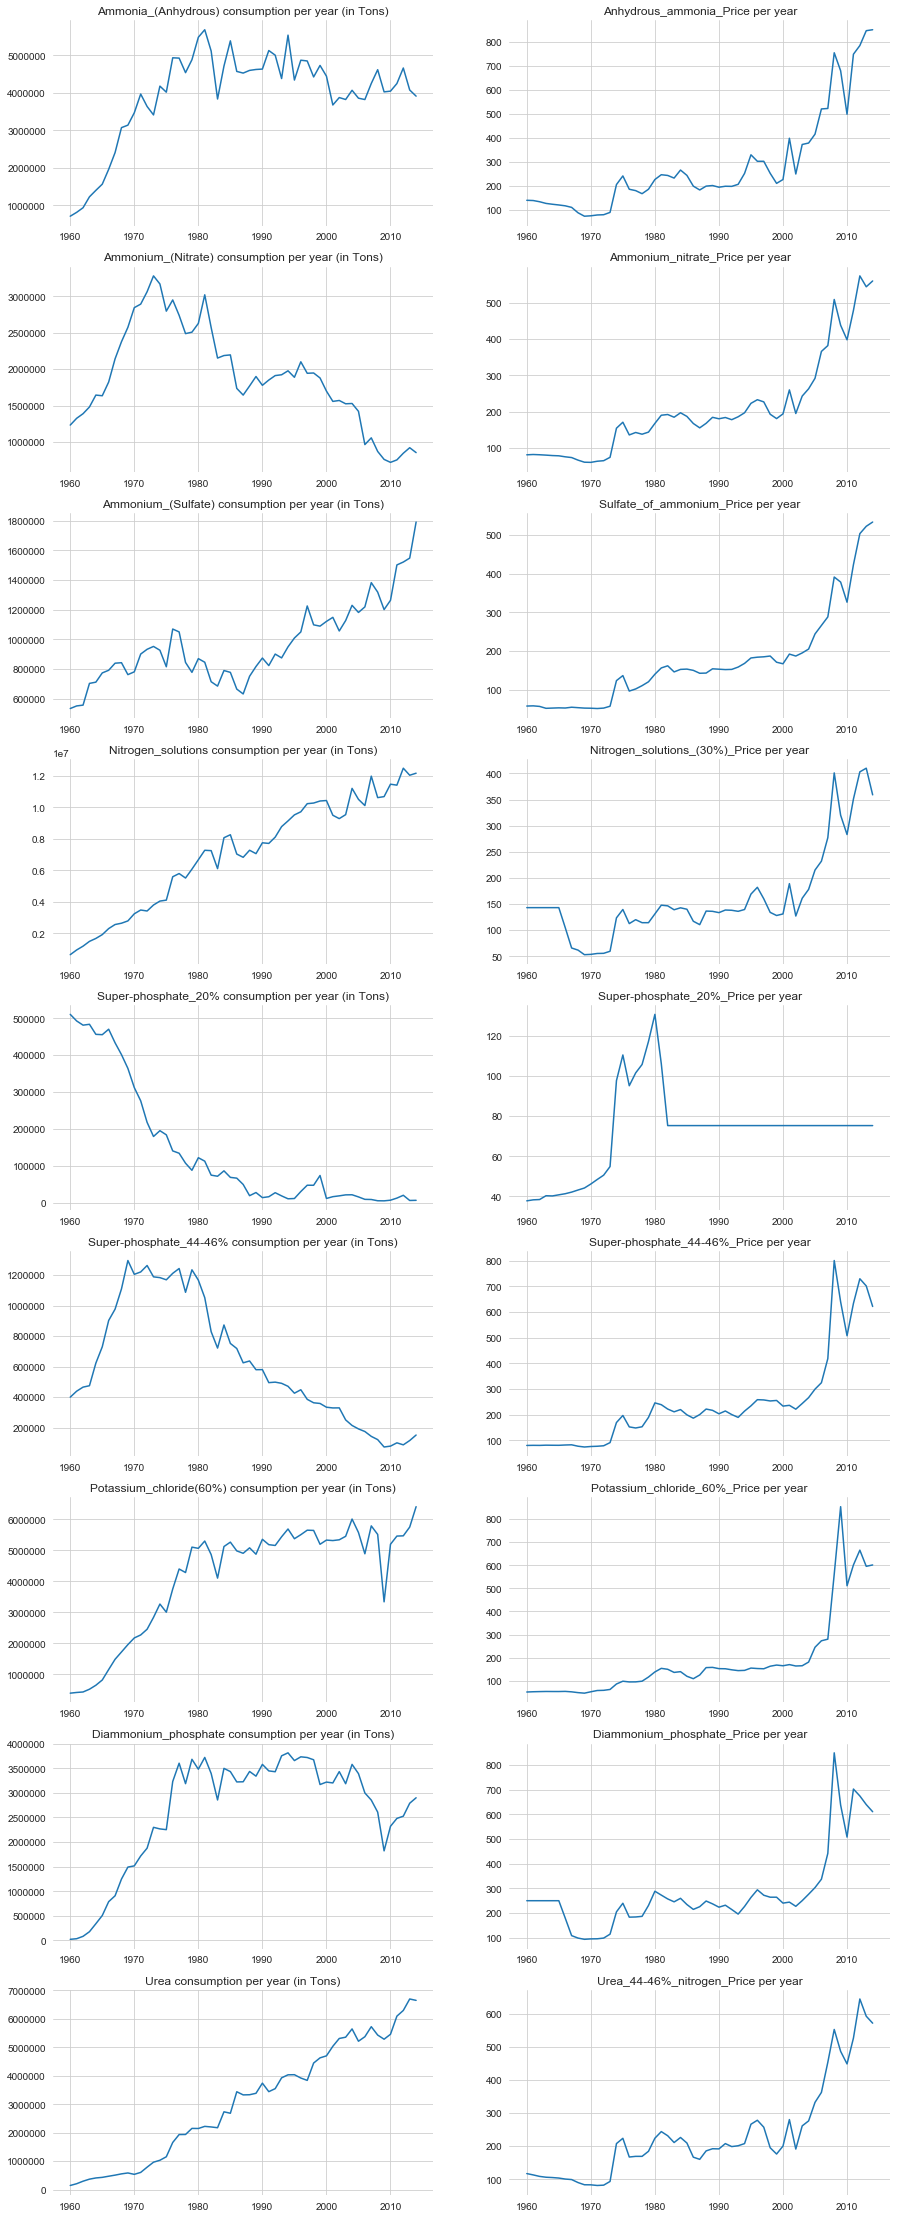

In [91]:
#Plotting fertiliser Conumption and Prices in 9 rows and 2 columns

#Creating two lists with the fertiliser consumption and prices respectively
fert_consumption = ["Ammonia_(Anhydrous)","Ammonium_(Nitrate)","Ammonium_(Sulfate)",
                    "Nitrogen_solutions","Super-phosphate_20%","Super-phosphate_44-46%",
                    "Potassium_chloride(60%)","Diammonium_phosphate","Urea"]

fert_price = ["Anhydrous_ammonia_Price","Ammonium_nitrate_Price",
              "Sulfate_of_ammonium_Price","Nitrogen_solutions_(30%)_Price",
              "Super-phosphate_20%_Price","Super-phosphate_44-46%_Price", 
              "Potassium_chloride_60%_Price", "Diammonium_phosphate_Price", "Urea_44-46%_nitrogen_Price"]

fig = plt.figure(figsize=(15,40))
sns.set_style("whitegrid")
counter = 1

#Plotting the Fertiliser Consumption in Tons on the left
for val in fert_consumption:
    ax = fig.add_subplot(9,2,counter)
    sns.lineplot(x="Year_Ending_June30", y=val,data=fertilizer_use["Consumption_and_Price"])
    ax.set_title(val+" consumption per year (in Tons)")
    counter += 2
    ax.set_xlabel("")
    ax.set_ylabel("")
counter = 2

#Plotting the Fertiliser Prices on the right
for val in fert_price:
    ax = fig.add_subplot(9,2,counter)
    sns.lineplot(x="Year_Ending_June30", y=val,data=fertilizer_use["Consumption_and_Price"])
    ax.set_title(val+" per year")
    counter += 2
    ax.set_xlabel("")
    ax.set_ylabel("")
sns.despine(left=True,bottom=True)
plt.xticks(ticks=None)
plt.yticks(ticks=None)
plt.show()

<u>Consumptions vs Price:</u>

<b>Negative Correlation</b>
- Ammonium_(Nitrate)% vs Ammonium_(Nitrate)_Price
- Super-Phosphate_44-46% vs Super-Phosphate_44-46%_Price<br>
- Super-Phosphate_20% vs Super-Phosphate_20_Price (price has flattened since 80's to now)

<b>Strong Positive Correlation</b>
- Ammonium_(Sulfate)% vs Ammonium_(Sulfate)_Price
- Urea% vs Urea_Price

<b>Weak Positive Correlation</b>
- Ammonia_(Anhydrous)% vs Ammonia_(Anhydrous)_Price
- Nitrogen_Solutions% vs Nitrogen_Solutions_30%_Price
- Potassium_Chloride_60% vs Potassium_Chloride_60%_Price

<b>No Correlation</b>
- Diammonium_Phosphate% vs Diammonium_Phosphate_Price

Confirming Pearson Coefficient for Consumption vs Price below

In [92]:
temp_var = fertilizer_use["Consumption_and_Price"].corr(method='pearson')
temp_var.to_excel("Pearson_Coeff_Consumption_vs_Price.xls")
temp_var

,Year_Ending_June30,Ammonia_(Anhydrous),Ammonia_(Aqua),Ammonium_(Nitrate),Ammonium_(Sulfate),Nitrogen_solutions,Sodium_nitrate,Urea,Other,Super-phosphate_20%,...,Other_single_nutrient,Anhydrous_ammonia_Price,Nitrogen_solutions_(30%)_Price,Urea_44-46%_nitrogen_Price,Ammonium_nitrate_Price,Sulfate_of_ammonium_Price,Super-phosphate_20%_Price,Super-phosphate_44-46%_Price,Diammonium_phosphate_Price,Potassium_chloride_60%_Price
Year_Ending_June30,1.000000,0.552135,-0.776469,-0.585210,0.824013,0.978567,-0.749745,0.990788,0.842212,-0.863750,...,0.817073,0.822180,0.735575,0.832541,0.869515,0.864540,0.390361,0.818720,0.687456,0.761473
Ammonia_(Anhydrous),0.552135,1.000000,-0.275532,0.231851,0.339409,0.659549,-0.872739,0.506507,0.243311,-0.839825,...,0.562014,0.254644,0.136352,0.335546,0.345922,0.351305,0.770951,0.349098,0.146873,0.245227
Ammonia_(Aqua),-0.776469,-0.275532,1.000000,0.652367,-0.552218,-0.741938,0.389669,-0.794803,-0.742692,0.638721,...,-0.555775,-0.602407,-0.594251,-0.616400,-0.652619,-0.662993,-0.199391,-0.601733,-0.551434,-0.565837
Ammonium_(Nitrate),-0.585210,0.231851,0.652367,1.000000,-0.467999,-0.484525,-0.043418,-0.634255,-0.661878,0.203287,...,-0.369879,-0.692034,-0.759852,-0.651141,-0.679427,-0.661633,0.214700,-0.646132,-0.728240,-0.666992
Ammonium_(Sulfate),0.824013,0.339409,-0.552218,-0.467999,1.000000,0.786846,-0.577688,0.805508,0.765818,-0.577336,...,0.597936,0.853079,0.763583,0.838713,0.855323,0.855404,0.255747,0.806470,0.705127,0.767961
Nitrogen_solutions,0.978567,0.659549,-0.741938,-0.484525,0.786846,1.000000,-0.788248,0.967624,0.782732,-0.901552,...,0.832168,0.764013,0.673705,0.790804,0.822555,0.817936,0.476471,0.770791,0.627004,0.693563
Sodium_nitrate,-0.749745,-0.872739,0.389669,-0.043418,-0.577688,-0.788248,1.000000,-0.696361,-0.461850,0.906403,...,-0.685425,-0.439982,-0.275937,-0.489090,-0.517628,-0.520191,-0.619401,-0.490467,-0.252228,-0.415320
Urea,0.990788,0.506507,-0.794803,-0.634255,0.805508,0.967624,-0.696361,1.000000,0.836705,-0.840173,...,0.798539,0.818338,0.740124,0.820344,0.861843,0.860045,0.369277,0.802627,0.684454,0.740068
Other,0.842212,0.243311,-0.742692,-0.661878,0.765818,0.782732,-0.461850,0.836705,1.000000,-0.588748,...,0.758818,0.745383,0.697320,0.726990,0.753200,0.733949,0.174425,0.721275,0.685014,0.688132
Super-phosphate_20%,-0.863750,-0.839825,0.638721,0.203287,-0.577336,-0.901552,0.906403,-0.840173,-0.588748,1.000000,...,-0.785605,-0.556623,-0.443649,-0.603903,-0.637556,-0.633617,-0.659591,-0.594556,-0.412125,-0.509401


Refer "Pearson_Coeff_Consumption_vs_Price.xls" which has colour coded Correlation, confirming observations from the line charts

In [93]:
plnt_nutr_cons = fertilizer_use["Plant_Nutrients_Consumption"].loc[:,["Year_ending_June_30","Nitrogen%","Phosphate%","Potash%"]]

In [94]:
plnt_nutr_cons.head()

,Year_ending_June_30,Nitrogen%,Phosphate%,Potash%
0,1960,36.684218,34.465480,28.850302
1,1961,38.636480,33.719596,27.643924
2,1962,39.893460,33.228766,26.877774
3,1963,41.335451,32.327940,26.336609
4,1964,41.612573,32.291617,26.095810


In [95]:
plnt_nutr_cons["Year_ending_June_30"].unique()

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015], dtype=int64)

Text(0.5, 1.0, 'Nutrient Consumption Percentage per year')

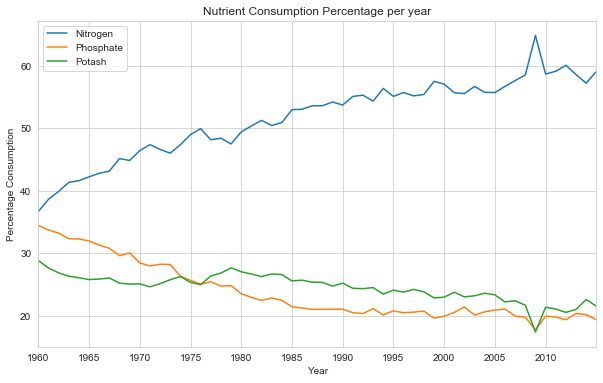

In [96]:
# Generating a mutiple plot for Nitrogen, Phosphate & Potash - Percentage Consumption per year from 1960 to 2015
fig = plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.lineplot(x="Year_ending_June_30",y="Nitrogen%",data=plnt_nutr_cons)
sns.lineplot(x="Year_ending_June_30",y="Phosphate%",data=plnt_nutr_cons)
sns.lineplot(x="Year_ending_June_30",y="Potash%",data=plnt_nutr_cons)
plt.xlim(1960,2015)
plt.xticks(np.arange(1960,2015,step=5))
plt.xlabel("Year")
plt.ylabel("Percentage Consumption")
plt.legend(('Nitrogen', 'Phosphate', 'Potash'), loc="upper left")
plt.title("Nutrient Consumption Percentage per year")


The above multiple plot shows us some interesting patterns.
1. Nitrogen always had the single highest share of plant nutrient consumption from 1960 to 2015 (i.e. for the whole time duration of population)
2. The consumption of Nitrogen as a percentage has increased gradually over the years in U.S. with the latest at 59% market share in 2015
3. There was a spike in Nitrogen consumption in 2009 from 58% to 65% then it dropped to sub 60% thereafter. For the same period, both Phosphate and Potash saw a decline to sub 20% market share each.
4. Phosphate and Potash both have a gradually declining market share from 1960 to 2015, starting from 35% and 29% to ending at 20% and 23% by 2015 respectively.

These patterns suggest that more crops have been cultivated in U.S. gradually over the years, that consumed Nitrogen as a main nutrient.

Text(0.5, 1.0, 'Fertiliser Consumption per year in Tons')

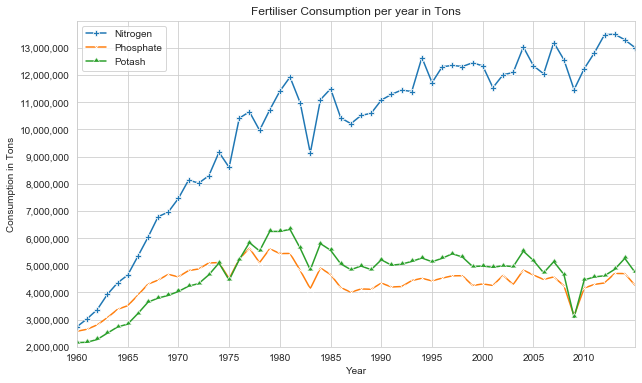

In [97]:
#Multiple plot for Consumption of Nutrients in Tons over the years

import matplotlib
plt.figure(figsize=(10,6))
#To avoid y-axis numbers from being changed to scientific exponential form
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
#Seaborn Multiplot
sns.lineplot(y="Nitrogen_(N)_Ton",x="Year_ending_June_30",data=fertilizer_use["Plant_Nutrients_Consumption"],marker='P')
sns.lineplot(y="Phosphate_(P205)_Ton",x="Year_ending_June_30",data=fertilizer_use["Plant_Nutrients_Consumption"],marker='x')
sns.lineplot(y="Potash_(K20)_Ton",x="Year_ending_June_30",data=fertilizer_use["Plant_Nutrients_Consumption"],marker=10)
#Set x and y limits and ticks
plt.xlim(1960,2015)
plt.xticks(np.arange(1960,2015,step=5))
plt.ylim(2000000,14000000)
plt.yticks(np.arange(2000000,14000000,step=1000000))
#To format the yticks with commas
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda y, p: format(int(y), ',')))

plt.legend(("Nitrogen","Phosphate","Potash"))
plt.xlabel('Year')
plt.ylabel('Consumption in Tons')
plt.title("Fertiliser Consumption per year in Tons")

## 4. Data Training & Prediction

For the purpose of this project, focussing the training and prediction for the strong correlation between Fertilizer Consumption and Prices. 

Strong Positive Correlation<br>
Ammonium_(Sulfate)% vs Ammonium_(Sulfate)_Price<br>
Urea% vs Urea_Price


In [98]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [99]:
fertilizer_use["Consumption_and_Price"].columns

Index(['Year_Ending_June30', 'Ammonia_(Anhydrous)', 'Ammonia_(Aqua)',
       'Ammonium_(Nitrate)', 'Ammonium_(Sulfate)', 'Nitrogen_solutions',
       'Sodium_nitrate', 'Urea', 'Other', 'Super-phosphate_20%',
       'Super-phosphate_44-46%', 'Other_single_phosphates',
       'Diammonium_phosphate', 'Monoammonium_phosphate',
       'Other_nitrogen-phosphate_grades', 'Potassium_chloride(60%)',
       'Other_single_nutrient', 'Anhydrous_ammonia_Price',
       'Nitrogen_solutions_(30%)_Price', 'Urea_44-46%_nitrogen_Price',
       'Ammonium_nitrate_Price', 'Sulfate_of_ammonium_Price',
       'Super-phosphate_20%_Price', 'Super-phosphate_44-46%_Price',
       'Diammonium_phosphate_Price', 'Potassium_chloride_60%_Price'],
      dtype='object')

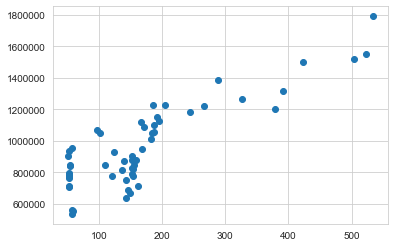

In [100]:
plt.scatter(fertilizer_use["Consumption_and_Price"]["Sulfate_of_ammonium_Price"],
         fertilizer_use["Consumption_and_Price"]["Ammonium_(Sulfate)"])

### Prediction using Linear Regression for 'Ammonium Sulphate Prices'

In [101]:
X = fertilizer_use["Consumption_and_Price"]["Ammonium_(Sulfate)"].values.reshape(-1,1)
y = fertilizer_use["Consumption_and_Price"]["Sulfate_of_ammonium_Price"].values.reshape(-1,1)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Using LinearRegression Algorithm to train and predict

In [103]:
linearreg = LinearRegression()
linearreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
print (linearreg.intercept_,linearreg.coef_)

[-201.08672309] [[0.00037804]]


In [105]:
y_pred = linearreg.predict(X_test)

Checking RMSE

In [106]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

64.63093916382144

In [107]:
#Creating a dataframe to store the arrays of actual dependent value (y_test) and predicted value (y_pred)
df = pd.DataFrame({"actual":y_test.flatten(),"predicted":y_pred.flatten()})

In [108]:
print(df)

    actual   predicted
0    153.0  129.593201
1     56.9    9.744406
2    150.0   50.529590
3    522.0  383.973714
4    182.0  180.539240
5    152.0  110.394258
6    391.0  297.363368
7    192.0  233.171699
8    152.5  139.659169
9    120.5   93.114982
10   288.0  321.476403


Plotting the Actual and Predicted values on the test set

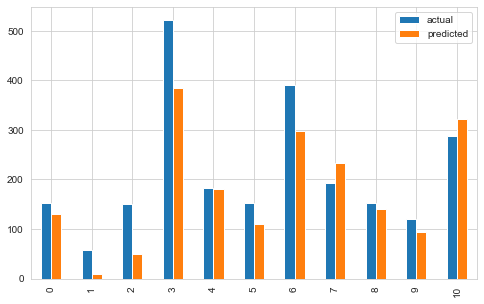

In [109]:
df.plot(kind='bar',figsize=(8,5))
#plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

Text(0.5, 1.0, 'Fitted line for predicted Prices of Ammonium Sulphate')

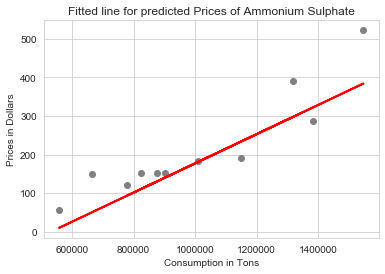

In [110]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel("Consumption in Tons")
plt.ylabel("Prices in Dollars")
plt.title("Fitted line for predicted Prices of Ammonium Sulphate")

### Prediction using Linear Regression for Urea Prices

In [111]:
X = fertilizer_use["Consumption_and_Price"]["Urea"].values.reshape(-1,1)
y = fertilizer_use["Consumption_and_Price"]["Urea_44-46%_nitrogen_Price"].values.reshape(-1,1)

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [113]:
linearreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [114]:
print("Intercept: ",linearreg.intercept_)
print("Coefficient: ",linearreg.coef_)

Intercept:  [68.96255166]
Coefficient:  [[5.34048962e-05]]


In [115]:
y_pred = linearreg.predict(X_test)

In [116]:
df_urea = pd.DataFrame({"Actual":y_test.flatten(),"Predicted":y_pred.flatten()})

In [117]:
print(df_urea)

    Actual   Predicted
0   191.50  268.634219
1   108.50   84.589999
2   166.50  252.472990
3   592.00  426.569320
4   266.00  284.464606
5   207.50  252.631229
6   552.00  358.882246
7   280.00  337.827846
8   198.50  258.296260
9   184.25  183.682944
10  453.00  374.576289


Calculating the Root Mean Squared Error

In [118]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

92.45270524855769

Plotting the Actual vs Predicted values on the test set

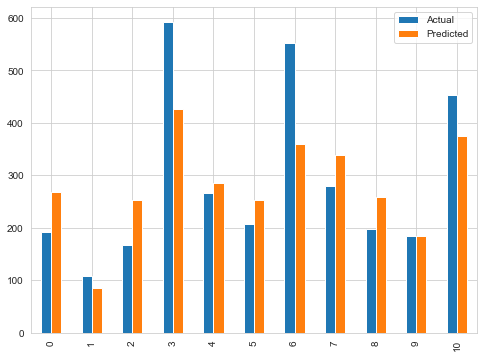

In [119]:
df_urea.plot(kind="bar",figsize=(8,6))

Text(0.5, 1.0, 'Fitted line for predicted Prices of Urea')

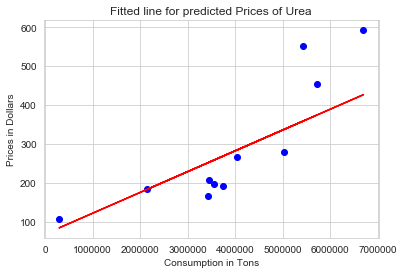

In [120]:
plt.scatter(X_test,y_test,color="blue")
plt.plot(X_test,y_pred,color="red")
plt.xlabel("Consumption in Tons")
plt.ylabel("Prices in Dollars")
plt.title("Fitted line for predicted Prices of Urea")